# Ensemble

In [1]:
from __future__      import division
from IPython.display import display
from matplotlib      import pyplot as plt
%matplotlib inline

import numpy  as np
import pandas as pd
import random, sys, os, re

# The test set has duplicates so we get the list of IDs in the sample file in order

In [2]:
id_list = []
with open('../submissions/Submission_Format.csv', 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        ID,prob = line.split(',')
        if ID == '': continue
        id_list.append(ID)

In [3]:
def get_filepaths(directory):
    """
    This function will generate the file names in a directory 
    tree by walking the tree either top-down or bottom-up. For each 
    directory in the tree rooted at directory top (including top itself), 
    it yields a 3-tuple list (dirpath, dirnames, filenames).
    """
    import os
    
    file_paths = []  # List which will store all of the full filepaths.

    # Walk the tree.
    for root, directories, files in os.walk(directory):
        for filename in files:
            # Join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  # Add it to the list.

    return file_paths 

# Get the list of submission files 

* ## remove the example file 
* ## and all ensembles

### BEFORE

In [4]:
file_list = get_filepaths('../submissions')
file_list

['../submissions/submission_0.4457_LogisticRegressionCV.csv',
 '../submissions/submission_voting_ensemble_hardWgtd.csv',
 '../submissions/submission_0.4465_bagged_scikit_nn.csv',
 '../submissions/submission_0.5974_boosted_logit_lbfgs.csv',
 '../submissions/submission_0.5670_SGDClassifier.csv',
 '../submissions/submission_1.7907_RandomForestClassifier.csv',
 '../submissions/submission_0.4527_bagged_gbc.csv',
 '../submissions/submission_0.4442_bagged_logit.csv',
 '../submissions/submission_0.6891_boosted_logit_sag.csv',
 '../submissions/Submission_Format.csv',
 '../submissions/submission_EnsembleOfAveragesBEST.csv',
 '../submissions/submission_0.4885_BaggingClassifier.csv',
 '../submissions/submission_EnsembleOfAveragesLeastCorr.csv',
 '../submissions/submission_0.4566_nolearn.csv',
 '../submissions/submission_voting_ensemble_hard.csv',
 '../submissions/submission_0.4415_voting_ensemble_soft.csv',
 '../submissions/submission_0.4851_XGBClassifier_vanilla.csv',
 '../submissions/submission_

### AFTER

In [5]:
# why do it more than once? For some reason it doesn't work if only run once. Who knows?
# ======================================================================================
for i in range(3):
    for file_name in file_list:
        if 'Format'   in file_name: file_list.remove(file_name)
        if 'Ensemble' in file_name: file_list.remove(file_name)
        if 'ensemble' in file_name: file_list.remove(file_name)
    
from copy import copy
file_list_all = copy(file_list)

file_list

['../submissions/submission_0.4457_LogisticRegressionCV.csv',
 '../submissions/submission_0.4465_bagged_scikit_nn.csv',
 '../submissions/submission_0.5974_boosted_logit_lbfgs.csv',
 '../submissions/submission_0.5670_SGDClassifier.csv',
 '../submissions/submission_1.7907_RandomForestClassifier.csv',
 '../submissions/submission_0.4527_bagged_gbc.csv',
 '../submissions/submission_0.4442_bagged_logit.csv',
 '../submissions/submission_0.6891_boosted_logit_sag.csv',
 '../submissions/submission_0.4885_BaggingClassifier.csv',
 '../submissions/submission_0.4566_nolearn.csv',
 '../submissions/submission_0.4851_XGBClassifier_vanilla.csv',
 '../submissions/submission_0.5020_scikit_nn.csv',
 '../submissions/submission_0.5334_boosted_svc.csv',
 '../submissions/submission_0.6642_AdaBoostClassifier.csv',
 '../submissions/submission_0.4411_LogisticRegression.csv',
 '../submissions/submission_0.5336_SVC.csv',
 '../submissions/submission_0.5732_cosine_similarity.csv',
 '../submissions/submission_0.4313_b

# ---------------------------------------------
# Ensemble ALL the submissions 
# ---------------------------------------------

# Find the average probability for all IDs

In [6]:
from collections import defaultdict

aggregates = defaultdict(list)
averages   = defaultdict(list)


# 1. collect the probabilities for each ID from all the submission files
# ======================================================================
for file_name in file_list:
    with open(file_name, 'r') as f:
        lines = f.read().splitlines()
        for line in lines:
            ID,prob = line.split(',')
            if ID == '': continue
            aggregates[ID].append(prob)
            
        
            
# 2. find the average of all the probabilities for each ID
# ========================================================
averages.update((ID, np.mean(map(float, probs))) for ID, probs in aggregates.items())

aggregates['1'],averages['1']

(['0.355096586523',
  '0.241185247898',
  '0.462771223664',
  '0.35',
  '0.1',
  '0.344323032548',
  '0.3080704208',
  '0.499746555027',
  '0.252661172161',
  '0.458084821701',
  '0.173246413469',
  '0.260312318802',
  '0.229568971977',
  '0.494101309394',
  '0.308123096572',
  '0.201544480802',
  '0.35',
  '0.221751779318',
  '0.360423053959',
  '0.40501948695',
  '0.296876234606',
  '0.35',
  '0.456327276011',
  '0.184227189057',
  '0.222222222222'],
 0.31542731573843996)

In [7]:
len(aggregates),len(averages)

(172, 172)

# Create a submission file of the ensemble of averages

In [8]:
f = open("../submissions/submission_EnsembleOfAveragesALL.csv", "w")

f.write(",Made Donation in March 2007\n")
for ID in id_list:
    f.write("{},{}\n".format(ID, averages[ID]))
    
f.close()

# ---------------------------------------------------------------
# Ensemble the submissions with high scores
# ---------------------------------------------------------------

### BEFORE

In [9]:
file_list

['../submissions/submission_0.4457_LogisticRegressionCV.csv',
 '../submissions/submission_0.4465_bagged_scikit_nn.csv',
 '../submissions/submission_0.5974_boosted_logit_lbfgs.csv',
 '../submissions/submission_0.5670_SGDClassifier.csv',
 '../submissions/submission_1.7907_RandomForestClassifier.csv',
 '../submissions/submission_0.4527_bagged_gbc.csv',
 '../submissions/submission_0.4442_bagged_logit.csv',
 '../submissions/submission_0.6891_boosted_logit_sag.csv',
 '../submissions/submission_0.4885_BaggingClassifier.csv',
 '../submissions/submission_0.4566_nolearn.csv',
 '../submissions/submission_0.4851_XGBClassifier_vanilla.csv',
 '../submissions/submission_0.5020_scikit_nn.csv',
 '../submissions/submission_0.5334_boosted_svc.csv',
 '../submissions/submission_0.6642_AdaBoostClassifier.csv',
 '../submissions/submission_0.4411_LogisticRegression.csv',
 '../submissions/submission_0.5336_SVC.csv',
 '../submissions/submission_0.5732_cosine_similarity.csv',
 '../submissions/submission_0.4313_b

### AFTER

In [10]:
# why do it more than once? For some reason it doesn't work if only run once. Who knows?
# ======================================================================================
for i in range(3):
    for file_name in file_list:
        if 'Format'   in file_name: file_list.remove(file_name)
        if 'Ensemble' in file_name: file_list.remove(file_name)

        # scores of 0.4... or 0.3... are good
        # files with SEED... are good-scoring models that were re-run with different random seeds
        if ('0.4' not  in file_name) and \
           ('0.3' not  in file_name) and \
           ('SEED' not in file_name):       
                file_list.remove(file_name)
    
file_list

['../submissions/submission_0.4457_LogisticRegressionCV.csv',
 '../submissions/submission_0.4465_bagged_scikit_nn.csv',
 '../submissions/submission_0.4527_bagged_gbc.csv',
 '../submissions/submission_0.4442_bagged_logit.csv',
 '../submissions/submission_0.4885_BaggingClassifier.csv',
 '../submissions/submission_0.4566_nolearn.csv',
 '../submissions/submission_0.4851_XGBClassifier_vanilla.csv',
 '../submissions/submission_0.4411_LogisticRegression.csv',
 '../submissions/submission_0.4313_bagged_nolearn.csv',
 '../submissions/submission_0.4648_GradientBoostingClassifier_engineering.csv',
 '../submissions/submission_0.4608_GradientBoostingClassifier.csv',
 '../submissions/submission_0.4452_GradientBoostingClassifier_exponential.csv',
 '../submissions/submission_0.4729_ExtraTreesClassifier.csv']

In [11]:
from collections import defaultdict

aggregates = defaultdict(list)
averages   = defaultdict(list)


# 1. collect the probabilities for each ID from all the submission files
# ======================================================================
for file_name in file_list:
    with open(file_name, 'r') as f:
        lines = f.read().splitlines()
        for line in lines:
            ID,prob = line.split(',')
            if ID == '': continue
            aggregates[ID].append(prob)
            
        
            
# 2. find the average of all the probabilities for each ID
# ========================================================
averages.update((ID, np.mean(map(float, probs))) for ID, probs in aggregates.items())

aggregates['1'],averages['1']

(['0.355096586523',
  '0.241185247898',
  '0.344323032548',
  '0.3080704208',
  '0.252661172161',
  '0.458084821701',
  '0.173246413469',
  '0.308123096572',
  '0.221751779318',
  '0.360423053959',
  '0.40501948695',
  '0.296876234606',
  '0.184227189057'],
 0.30069911812015387)

In [12]:
len(aggregates),len(averages)

(172, 172)

In [13]:
f = open("../submissions/submission_EnsembleOfAveragesBEST.csv", "w")

f.write(",Made Donation in March 2007\n")
for ID in id_list:
    f.write("{},{}\n".format(ID, averages[ID]))
    
f.close()

# ---------------------------------------------------------------
# Ensemble the least-correlated submissions 
# ---------------------------------------------------------------

# Create a dataframe with one column per submission

In [14]:
from os.path import split
corr_table = pd.read_csv(file_list_all[0],names=['id',split(file_list_all[0])[1][11:-4]],header=0,index_col=0)
corr_table.head()

,0.4457_LogisticRegressionCV
id,
659,0.492508
276,0.108672
263,0.265208
303,0.328875
83,0.538460


In [15]:
for file_path in file_list_all[1:]:
    temp = pd.read_csv(file_path,names=['id',split(file_path)[1][11:-4]],header=0,index_col=0)
    corr_table[temp.columns[0]] = temp[[temp.columns[0]]]
corr_table.head()

,0.4457_LogisticRegressionCV,0.4465_bagged_scikit_nn,0.5974_boosted_logit_lbfgs,0.5670_SGDClassifier,1.7907_RandomForestClassifier,0.4527_bagged_gbc,0.4442_bagged_logit,0.6891_boosted_logit_sag,0.4885_BaggingClassifier,0.4566_nolearn,...,0.5336_SVC,0.5732_cosine_similarity,0.4313_bagged_nolearn,0.4648_GradientBoostingClassifier_engineering,0.4608_GradientBoostingClassifier,0.4452_GradientBoostingClassifier_exponential,0.6289_KMeans,0.5891_boosted_logit_newton,0.4729_ExtraTreesClassifier,1.1870_KNeighborsClassifier
id,,,,,,,,,,,,,,,,,,,,,
659,0.492508,0.467785,0.512642,0.65,0.800000,0.397056,0.479018,0.500173,0.575167,0.516338,...,0.243941,0.35,0.539235,0.561879,0.446919,0.385171,0.65,0.514225,0.536953,0.333333
276,0.108672,0.109523,0.369166,0.35,0.100000,0.198108,0.135497,0.494546,0.163342,0.100744,...,0.243941,0.35,0.066911,0.167286,0.282111,0.320849,0.35,0.357720,0.049319,0.111111
263,0.265208,0.134464,0.451774,0.35,0.076074,0.172214,0.243379,0.499761,0.107335,0.296101,...,0.201509,0.35,0.203950,0.167521,0.230932,0.176180,0.35,0.443262,0.125177,0.222222
303,0.328875,0.113216,0.446446,0.35,0.300000,0.300384,0.358997,0.497743,0.228548,0.352704,...,0.243941,0.35,0.292067,0.302466,0.380433,0.309082,0.65,0.441666,0.246117,0.111111
83,0.538460,0.577198,0.507131,0.65,0.400000,0.529633,0.542771,0.499948,0.582667,0.561664,...,0.243941,0.65,0.612925,0.688591,0.584940,0.564327,0.65,0.508212,0.660217,0.333333


# Display the correlations among the submissions

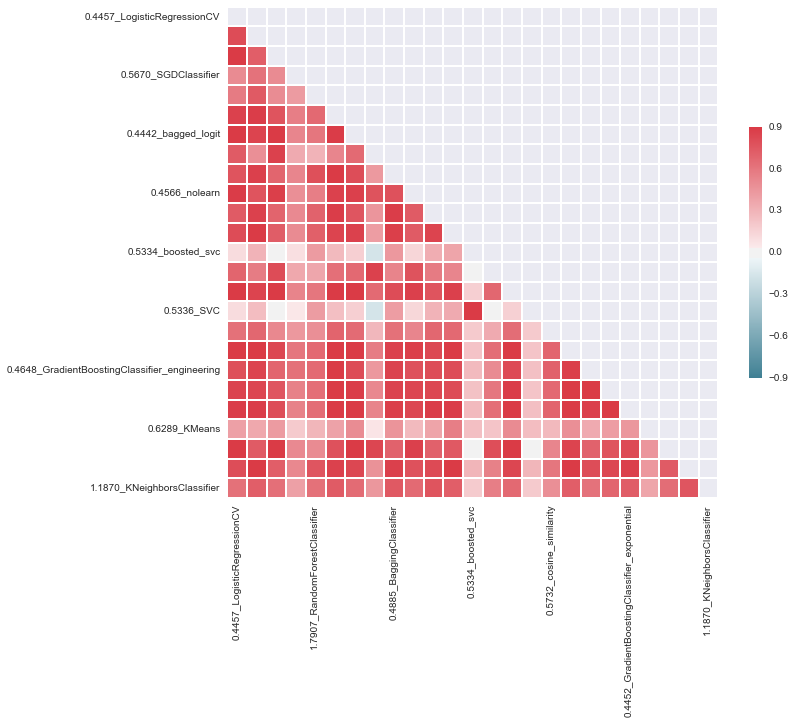

In [16]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = corr_table.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.9,
            square=True, xticklabels=4, yticklabels=3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

# Find the least-correlated pairs of submissions

In [17]:
corr_threshold = 0.20

indices = np.where(corr_matrix < corr_threshold)
indices = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.ix[x,y]) for x, y in zip(*indices)
                                        if x != y and x < y]

from operator import itemgetter
indices.sort(key=itemgetter(2))
len(indices),indices

(24,
 [('0.6891_boosted_logit_sag', '0.5334_boosted_svc', -0.16550692743673115),
  ('0.6891_boosted_logit_sag', '0.5336_SVC', -0.16494092027342691),
  ('0.6642_AdaBoostClassifier', '0.5336_SVC', -0.0099063674141259602),
  ('0.5334_boosted_svc', '0.6642_AdaBoostClassifier', -0.0011863362569463894),
  ('0.5974_boosted_logit_lbfgs', '0.5334_boosted_svc', 0.011975138348080042),
  ('0.5974_boosted_logit_lbfgs', '0.5336_SVC', 0.014320591849702654),
  ('0.5334_boosted_svc', '0.5891_boosted_logit_newton', 0.030002610460851915),
  ('0.5336_SVC', '0.5891_boosted_logit_newton', 0.032464490936548802),
  ('0.5670_SGDClassifier', '0.5336_SVC', 0.055922689607270301),
  ('0.6891_boosted_logit_sag', '0.6289_KMeans', 0.069626679789736245),
  ('0.5670_SGDClassifier', '0.5334_boosted_svc', 0.092501441774125684),
  ('0.4457_LogisticRegressionCV', '0.5334_boosted_svc', 0.1081850684277918),
  ('0.4457_LogisticRegressionCV', '0.5336_SVC', 0.10846738136905446),
  ('0.4566_nolearn', '0.5336_SVC', 0.131916155532

In [18]:
least_corr = set(set(['../submissions/submission_'+a+'.csv' for a,b,c in indices]).\
             union(set(['../submissions/submission_'+b+'.csv' for a,b,c in indices])))

len(least_corr), least_corr

(14,
 {'../submissions/submission_0.4411_LogisticRegression.csv',
  '../submissions/submission_0.4442_bagged_logit.csv',
  '../submissions/submission_0.4457_LogisticRegressionCV.csv',
  '../submissions/submission_0.4566_nolearn.csv',
  '../submissions/submission_0.5334_boosted_svc.csv',
  '../submissions/submission_0.5336_SVC.csv',
  '../submissions/submission_0.5670_SGDClassifier.csv',
  '../submissions/submission_0.5732_cosine_similarity.csv',
  '../submissions/submission_0.5891_boosted_logit_newton.csv',
  '../submissions/submission_0.5974_boosted_logit_lbfgs.csv',
  '../submissions/submission_0.6289_KMeans.csv',
  '../submissions/submission_0.6642_AdaBoostClassifier.csv',
  '../submissions/submission_0.6891_boosted_logit_sag.csv',
  '../submissions/submission_1.1870_KNeighborsClassifier.csv'})

In [19]:
from collections import defaultdict

aggregates = defaultdict(list)
averages   = defaultdict(list)


# 1. collect the probabilities for each ID from all the submission files
# ======================================================================
for file_name in least_corr:
    with open(file_name, 'r') as f:
        lines = f.read().splitlines()
        for line in lines:
            ID,prob = line.split(',')
            if ID == '': continue
            aggregates[ID].append(prob)
            
        
            
# 2. find the average of all the probabilities for each ID
# ========================================================
averages.update((ID, np.mean(map(float, probs))) for ID, probs in aggregates.items())

aggregates['1'],averages['1']

(['0.462771223664',
  '0.35',
  '0.3080704208',
  '0.499746555027',
  '0.355096586523',
  '0.35',
  '0.35',
  '0.201544480802',
  '0.229568971977',
  '0.494101309394',
  '0.458084821701',
  '0.456327276011',
  '0.222222222222',
  '0.308123096572'],
 0.36040406890664289)

In [20]:
f = open("../submissions/submission_EnsembleOfAveragesLeastCorr.csv", "w")

f.write(",Made Donation in March 2007\n")
for ID in id_list:
    f.write("{},{}\n".format(ID, averages[ID]))
    
f.close()